**IMPORTANDO BIBLIOTECAS**

In [2]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import Perceptron


from sklearn.preprocessing import MinMaxScaler

#Funções de avaliação dos modelos
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, GridSearchCV
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

**ANÁLISE DO CONJUNTO DE DADOS**

In [3]:
#Carregando o dataset
df = pd.read_csv('https://raw.githubusercontent.com/albanoxdz/UFPE_ModPD/main/music_genre.csv')
dataset = df.query('music_genre == "Anime" | music_genre == "Hip-Hop" | music_genre == "Rock"')
#Selecionar colunas
dataset_norm = dataset[['popularity','danceability']].copy()
dataset_norm

,popularity,danceability
5000,11.0,0.362
5001,26.0,0.627
5002,29.0,0.643
5003,18.0,0.585
5004,50.0,0.567
...,...,...
50000,59.0,0.913
50001,72.0,0.709
50002,51.0,0.693
50003,65.0,0.782


In [4]:
print("Quantas classes existem nesse dataset?\n%d" %(len(dataset["music_genre"].unique())))
print("\nQuantas instâncias existem no dataset?\n%d" %(len(dataset)))
print("\nQuantas features existem no dataset?\n%d" %(dataset.shape[1]))
print("\nQue features são essas?\n%s" %(str([k for k in dataset.keys()])))
print("\nQual o numero de instâncias por classe?")
print(dataset["music_genre"].value_counts())

Quantas classes existem nesse dataset?
3

Quantas instâncias existem no dataset?
15000

Quantas features existem no dataset?
18

Que features são essas?
['instance_id', 'artist_name', 'track_name', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre']

Qual o numero de instâncias por classe?
Anime      5000
Rock       5000
Hip-Hop    5000
Name: music_genre, dtype: int64


In [ ]:
dataset

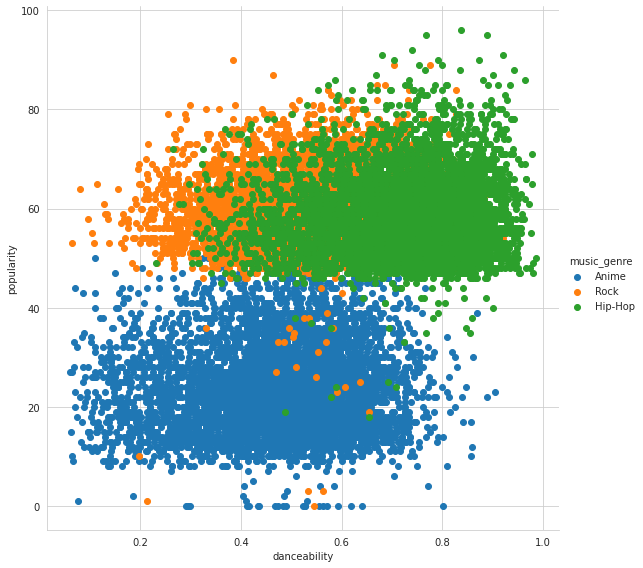

In [5]:
# Distribuição das classes pelas features SepalLengthCm e SepalWidthCm
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue ="music_genre",
              height = 8).map(plt.scatter,
                              'danceability',
                              'popularity').add_legend()

In [6]:
# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['music_genre'] = pd.factorize(dataset['music_genre'])[0]
dataset

# 0 - Anime
# 1 - Rock
# 2 - Hip-Hop

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5000,36281.0,Capcom Sound Team,終幕組曲【冒險の終わり】,11.0,0.01540,0.362,429560.0,0.456,0.024100,D,0.2580,-11.355,Minor,0.0376,117.634,4-Apr,0.332,0
5001,78964.0,ayaka,そこまで歩いていくよ,26.0,0.82000,0.627,-1.0,0.350,0.000000,G,0.1250,-7.951,Major,0.0291,135.937,4-Apr,0.173,0
5002,31517.0,Hachioji P,KiLLER LADY - Eight Mix,29.0,0.00857,0.643,234874.0,0.966,0.003310,A#,0.2550,-3.902,Minor,0.0442,131.982,4-Apr,0.912,0
5003,29349.0,LiSA,Bad Sweet Trap,18.0,0.00711,0.585,229147.0,0.991,0.000002,F,0.1100,-2.817,Minor,0.1170,?,4-Apr,0.580,0
5004,84837.0,Hiroyuki Sawano,Call Your Name,50.0,0.01450,0.567,268333.0,0.300,0.000000,B,0.0687,-8.421,Minor,0.0291,141.819,4-Apr,0.196,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.000000,C#,0.1190,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,2
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.1090,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,2
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.1430,-5.443,Major,0.1460,131.079,4-Apr,0.395,2
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.1060,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,2


**SEPARANDO O CONJUNTO DE DADOS**

In [7]:
#Vamos usar somente duas features popularity e danceability
#X = dataset.iloc[:,[3,4,5,6,7,8,10,11,13,16]]
X = dataset.iloc[:,[3,5]]
y = dataset.iloc[:,[17]]

print(X)
print(y)

       popularity  danceability
5000         11.0         0.362
5001         26.0         0.627
5002         29.0         0.643
5003         18.0         0.585
5004         50.0         0.567
...           ...           ...
50000        59.0         0.913
50001        72.0         0.709
50002        51.0         0.693
50003        65.0         0.782
50004        67.0         0.862

[15000 rows x 2 columns]
       music_genre
5000             0
5001             0
5002             0
5003             0
5004             0
...            ...
50000            2
50001            2
50002            2
50003            2
50004            2

[15000 rows x 1 columns]


In [10]:
#Definição de arrays de suporte com modelos a serem analisados
names = ["KNeighborsClassifier", "DecisionTreeClassifier", "Perceptron", "MLPClassifier", "GaussianNB", "linearSVC"]
classifiers = [
                  KNeighborsClassifier(),
                  DecisionTreeClassifier(),
                  Perceptron(),
                  MLPClassifier(),
                  GaussianNB(),
                  LinearSVC()
      
                 ]

GRID SEARCH

In [27]:
#Separando os Folds para serem utilizados em todos os modelos
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

def grid_Search(skf,model,parameters):
  accuracies_list = []
  fold = 0
  grid_accuracy = 0
  for train, test in skf.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        grid = GridSearchCV(estimator = model,             # É o modelo a ser testado
                    param_grid = parameters,           # É aquele dicionário com valores para serem testados.
                    scoring = 'accuracy',              # A métrica de avaliação
                    cv = 5)
        
        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)

        current_accuracy_score = accuracy_score(y_test, y_pred)
        if current_accuracy_score > grid_accuracy:
          grid_accuracy = current_accuracy_score


        print("Melhor parametro:", grid.best_params_)         
        print("Fold %d: %.3f" %(fold, current_accuracy_score))
        
        accuracies_list.append(current_accuracy_score)
        fold += 1
    
  accuracies = np.array(accuracies_list)
  print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))
  return pd.DataFrame(grid.cv_results_)

df_scaled = maximum_absolute_scaling(dataset_norm)
#print(df_scaled)

In [ ]:
#trecho de codigo para testar gridsearch antes de rodar todos os modelos
model = KNeighborsClassifier()
parameters = {'n_neighbors': [5, 10],
                'weights':["uniform", "distance"]
                }
grid_Search(skf,model,parameters)

In [ ]:
#GRID SEARCH PARA KNN
model = KNeighborsClassifier()
parameters = {'n_neighbors': [5, 10],
                'weights':["uniform", "distance"]
                }
grid_Search(skf,model,parameters)

#GRID SEARCH PARA DT
model = DecisionTreeClassifier(random_state=199)
parameters = {'min_samples_split': [10, 30],
                'max_depth':[5, 30],
                'max_features':[2, 5, 10]
                }
grid_Search(skf,model,parameters)

#GRID SEARCH PARA PERCEPTRON
model = Perceptron(random_state=199)
parameters = {'alpha': [0.0001, 0.01],
						  'n_iter_no_change': [5, 10]}
grid_Search(skf,model,parameters)

#GRID SEARCH PARA MLP
model = MLPClassifier()
parameters={
            'learning_rate': ["constant", "invscaling", "adaptive"],
            'hidden_layer_sizes': [(10,1), (10,2), (10,3)],
            'activation': ["logistic", "relu", "Tanh"]
            }
grid_Search(skf,model,parameters)

#GRID SEARCH PARA NB
#Parametros tem distribuição normal, desta forma foi avaliado apenas o NB Gaussiano
#https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb
model = GaussianNB()
parameters = {'var_smoothing': np.logspace(0,-9, num=10)}
grid_Search(skf,model,parameters)

#GRID SEARCH PARA SVM
model = SVC()
#C 
# kernel - 
parameters = {'C':[100, 1000],
                'kernel': ['linear', 'rbf']}
grid_Search(skf,model,parameters)

**AVALIANDO MODELO**

In [33]:
def show_decision_region(x, y, clf):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel("popularity")
    plt.ylabel("danceability")

    plt.title(clf.__class__.__name__)
    plt.show()

def evaluate_model(kf, model, classifier_name):
    accuracies_list = []
    fold = 0
    print(classifier_name)
    for train, test in kf.split(X, y):
        
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print("Fold %d" %(fold))
        print("accuracy_score: %.3f" %(accuracy_score(y_test, y_pred)))
        
        #Resultados do classificador
        #print(classification_report(y_test, y_pred))

        #plot_roc_curve(model, X_test, y_test)
        #plot_confusion_matrix(model, X_test, y_test)
        #show_decision_region(np.array([X_test["popularity"].values, X_test["danceability"].values]).T, y_test.values.reshape(-1,1).T[0], model)

        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1
    accuracies = np.array(accuracies_list)
    print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))


In [35]:
#KNeighborsClassifier()
#Separando os Folds para serem utilizados em todos os modelos
#skf = StratifiedKFold(n_splits=2, random_state=10, shuffle=True)

model = LinearSVC()
classifier_name = "LinearSVC"
evaluate_model(skf, model, classifier_name)

LinearSVC
Fold 0
accuracy_score: 0.695
Fold 1
accuracy_score: 0.829
Fold 2
accuracy_score: 0.782
Fold 3
accuracy_score: 0.807
Fold 4
accuracy_score: 0.651
Fold 5
accuracy_score: 0.712
Fold 6
accuracy_score: 0.708
Fold 7
accuracy_score: 0.815
Fold 8
accuracy_score: 0.812
Fold 9
accuracy_score: 0.789

Acurácia média (desvio): 0.760 +- (0.059)


In [34]:
#for model_name, clf in zip(names, classifiers):
#    model = clf
#    classifier_name = model_name
#    evaluate_model(KFold(n_splits=10, random_state=10, shuffle=True), model, classifier_name)

#KNeighborsClassifier()
model = KNeighborsClassifier()
classifier_name = "KNeighborsClassifier"
evaluate_model(skf, model, classifier_name)

#DecisionTreeClassifier()
model = DecisionTreeClassifier()
classifier_name = "DecisionTreeClassifier"
evaluate_model(skf, model, classifier_name)

#Perceptron()
model = Perceptron()
classifier_name = "Perceptron"
evaluate_model(skf, model, classifier_name)

#MLPClassifier()
model = MLPClassifier()
classifier_name = "MLPClassifier"
evaluate_model(skf, model, classifier_name)

#GaussianNB()
model = GaussianNB()
classifier_name = "GaussianNB"
evaluate_model(skf, model, classifier_name)

#SVC()
model = LinearSVC()
classifier_name = "LinearSVC"
evaluate_model(skf, model, classifier_name)




KNeighborsClassifier
Fold 0
accuracy_score: 0.800
Fold 1
accuracy_score: 0.820
Fold 2
accuracy_score: 0.808
Fold 3
accuracy_score: 0.806
Fold 4
accuracy_score: 0.811
Fold 5
accuracy_score: 0.794
Fold 6
accuracy_score: 0.822
Fold 7
accuracy_score: 0.809
Fold 8
accuracy_score: 0.793
Fold 9
accuracy_score: 0.804

Acurácia média (desvio): 0.807 +- (0.009)
DecisionTreeClassifier
Fold 0
accuracy_score: 0.765
Fold 1
accuracy_score: 0.785
Fold 2
accuracy_score: 0.782
Fold 3
accuracy_score: 0.755
Fold 4
accuracy_score: 0.753
Fold 5
accuracy_score: 0.760
Fold 6
accuracy_score: 0.783
Fold 7
accuracy_score: 0.770
Fold 8
accuracy_score: 0.759
Fold 9
accuracy_score: 0.745

Acurácia média (desvio): 0.766 +- (0.013)
Perceptron
Fold 0
accuracy_score: 0.801
Fold 1
accuracy_score: 0.674
Fold 2
accuracy_score: 0.666
Fold 3
accuracy_score: 0.798
Fold 4
accuracy_score: 0.841
Fold 5
accuracy_score: 0.777
Fold 6
accuracy_score: 0.741
Fold 7
accuracy_score: 0.636
Fold 8
accuracy_score: 0.637
Fold 9
accuracy_sc

TypeError: ignored

**Métricas**

*   **Precision** - $\frac{tp}{(tp + fp)}$
*   **Recall** - $\frac{tp}{(tp + fn)}$ 
*   **F1-score** - $2 * \frac{(precision * recall)}{(precision + recall)}$
*   **Accuracy** - $\frac{C}{T}$
*   **Macro avg** - Calcule as métricas para cada rótulo e encontre sua média não ponderada.
*   **Weighted avg** - Calcule as métricas para cada rótulo e encontre sua média ponderada pelo suporte (o número de instâncias verdadeiras para cada rótulo).

**tp** - verdadeiros positivos

**fp** - falsos positivos

**fn** - falsos negativos

**C** - Número de predições corretas

**T** - Número total de predições